In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
import scipy
import arviz as az
import pymc3 as pm
from tqdm import tqdm
import theano
import theano.tensor as tt
from theano.ifelse import ifelse
import pandas as pd
import datetime
import dtw

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from utils import DataReader
from smooth import average
from align import dtw_align

In [3]:
theano.config.floatX= 'float64'
az.style.use("arviz-darkgrid")

In [4]:
start_date = datetime.date(2020, 9, 10)
forecast_fixed_start_date = datetime.date(2021, 5, 25)
forecast_start_date = datetime.date(2021, 6, 10)
end_date = datetime.date(2021, 6, 30)

In [5]:
smooth_scale = 3
smooth_iteration = 10

In [6]:
de_covid19_csv = "dataset/DE_COVID19.csv"
de_covid19_df = pd.read_csv(de_covid19_csv)
de_policy_csv = "dataset/DE_Policy.csv"
de_policy_df = pd.read_csv(de_policy_csv)
germany_dr = DataReader("DE", de_covid19_df, de_policy_df)
germany_dr.start_date = start_date
germany_dr.end_date = end_date

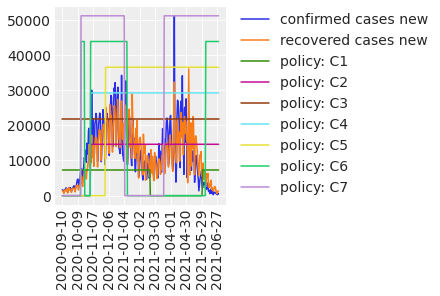

In [7]:
germany_it = np.array(germany_dr.confirmed_cases_new)
germany_it = np.maximum(germany_it, 1)
germany_rt = np.log(germany_it[1:]/germany_it[:-1])
germany_rtavg = average(germany_rt, scale=smooth_scale, iteration=smooth_iteration)
germany_dr.plot()

In [8]:
it_covid19_csv = "dataset/IT_COVID19.csv"
it_covid19_df = pd.read_csv(it_covid19_csv)
it_policy_csv = "dataset/IT_Policy.csv"
it_policy_df = pd.read_csv(it_policy_csv)
italy_dr = DataReader("IT", it_covid19_df, it_policy_df)
italy_dr.start_date = start_date
italy_dr.end_date = end_date

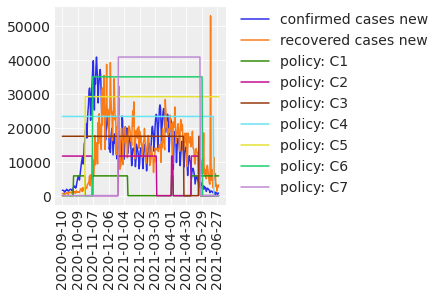

In [9]:
italy_it = np.array(italy_dr.confirmed_cases_new)
italy_it = np.maximum(italy_it, 1)
italy_rt = np.log(italy_it[1:]/italy_it[:-1])
italy_rtavg = average(italy_rt, scale=smooth_scale, iteration=smooth_iteration)
italy_dr.plot()

In [10]:
at_covid19_csv = "dataset/AT_COVID19.csv"
at_covid19_df = pd.read_csv(at_covid19_csv)
at_policy_csv = "dataset/AT_Policy.csv"
at_policy_df = pd.read_csv(at_policy_csv)
austria_dr = DataReader("AT", at_covid19_df, at_policy_df)
austria_dr.start_date = start_date
austria_dr.end_date = end_date

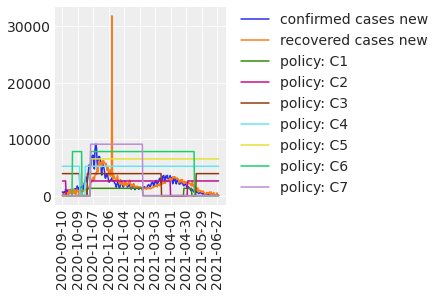

In [11]:
austria_it = np.array(austria_dr.confirmed_cases_new)
austria_it = np.maximum(austria_it, 1)
austria_rt = np.log(austria_it[1:]/austria_it[:-1])
austria_rtavg = average(austria_rt, scale=smooth_scale, iteration=smooth_iteration)
austria_dr.plot()

In [12]:
pl_covid19_csv = "dataset/PL_COVID19.csv"
pl_covid19_df = pd.read_csv(pl_covid19_csv)
pl_policy_csv = "dataset/PL_Policy.csv"
pl_policy_df = pd.read_csv(pl_policy_csv)
poland_dr = DataReader("PL", pl_covid19_df, pl_policy_df)
poland_dr.start_date = start_date
poland_dr.end_date = end_date

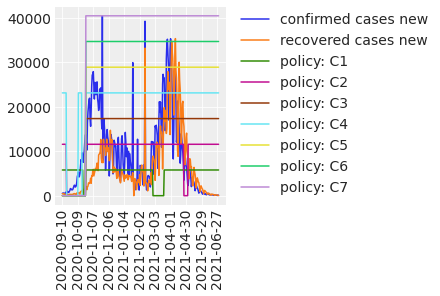

In [13]:
poland_it = np.array(poland_dr.confirmed_cases_new)
poland_it = np.maximum(poland_it, 1)
poland_rt = np.log(poland_it[1:]/poland_it[:-1])
poland_rtavg = average(poland_rt, scale=smooth_scale, iteration=smooth_iteration)
poland_dr.plot()

In [14]:
be_covid19_csv = "dataset/BE_COVID19.csv"
be_covid19_df = pd.read_csv(be_covid19_csv)
be_policy_csv = "dataset/BE_Policy.csv"
be_policy_df = pd.read_csv(be_policy_csv)
belgium_dr = DataReader("BE", be_covid19_df, be_policy_df)
belgium_dr.start_date = start_date
belgium_dr.end_date = end_date

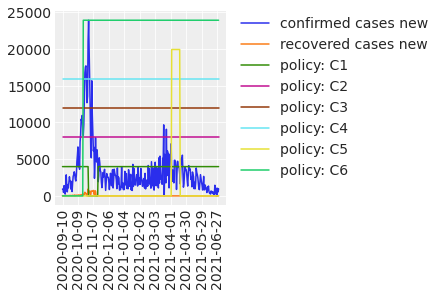

In [15]:
belgium_it = np.array(belgium_dr.confirmed_cases_new)
belgium_it = np.maximum(belgium_it, 1)
belgium_it = [belgium_it[i] if belgium_it[i]!=1 else belgium_it[i-1] for i in range(len(belgium_it))]
belgium_it = [belgium_it[i] if belgium_it[i]!=1 else belgium_it[i-1] for i in range(len(belgium_it))]
belgium_it = [belgium_it[i] if belgium_it[i]!=1 else belgium_it[i-1] for i in range(len(belgium_it))]
belgium_it = np.array(belgium_it)
belgium_rt = np.log(belgium_it[1:]/belgium_it[:-1])
belgium_rtavg = average(belgium_rt, scale=smooth_scale, iteration=smooth_iteration)
belgium_dr.plot()

In [16]:
hr_covid19_csv = "dataset/HR_COVID19.csv"
hr_covid19_df = pd.read_csv(hr_covid19_csv)
hr_policy_csv = "dataset/HR_Policy.csv"
hr_policy_df = pd.read_csv(hr_policy_csv)
croatia_dr = DataReader("HR", hr_covid19_df, hr_policy_df)
croatia_dr.start_date = start_date
croatia_dr.end_date = end_date

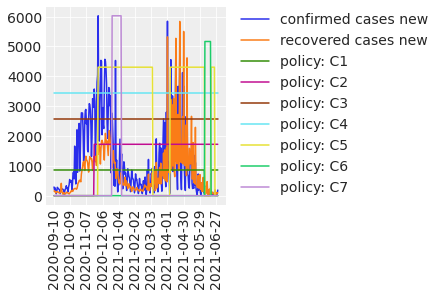

In [17]:
croatia_it = np.array(croatia_dr.confirmed_cases_new)
croatia_it = np.maximum(croatia_it, 1)
for i in range(3):
    croatia_it = [croatia_it[i] if croatia_it[i]!=1 else croatia_it[i-1] for i in range(len(croatia_it))]
    pass
croatia_it = np.array(croatia_it)
croatia_rt = np.log(croatia_it[1:]/croatia_it[:-1])
croatia_rtavg = average(croatia_rt, scale=smooth_scale, iteration=smooth_iteration)
croatia_dr.plot()

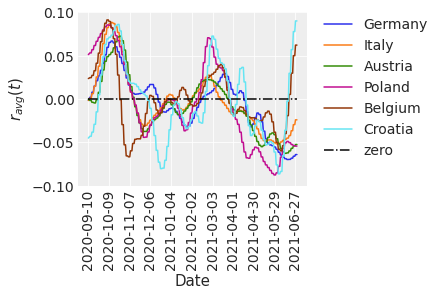

In [18]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(germany_rtavg, label=r"Germany")
ax.plot(italy_rtavg, label=r"Italy")
ax.plot(austria_rtavg, label=r"Austria")
ax.plot(poland_rtavg, label=r"Poland")
ax.plot(belgium_rtavg, label=r"Belgium")
ax.plot(croatia_rtavg, label=r"Croatia")
ax.plot(np.zeros(len(germany_rtavg)), "-.", color="black", label="zero")
dates = germany_dr.dates
plt.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
x_day_interval = max(1, (len(dates)-1) // 10)
plt.xticks(list(range(0, len(dates), x_day_interval)), dates[0::x_day_interval], rotation="vertical")
plt.ylim(-0.1, 0.1)
plt.xlabel("Date")
plt.ylabel(r"$r_{avg}(t)$")
plt.show()

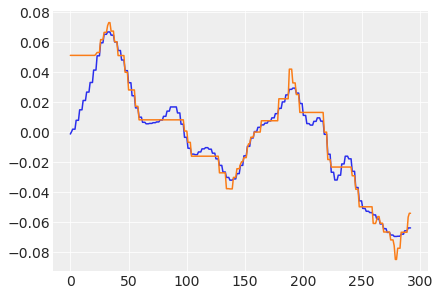

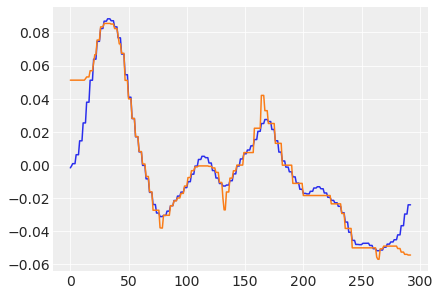

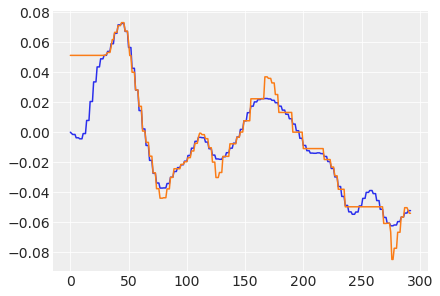

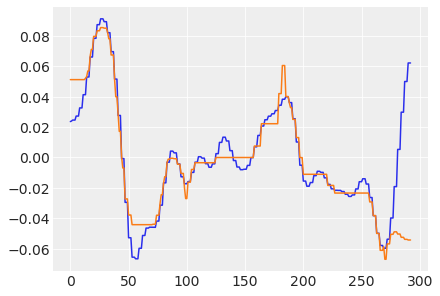

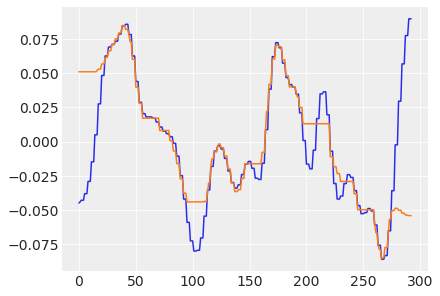

In [19]:
indices = dtw_align(poland_rtavg, germany_rtavg)
plt.plot(germany_rtavg)
plt.plot(poland_rtavg[indices])
#plt.plot(poland_rtavg)
plt.show()
indices = dtw_align(poland_rtavg, italy_rtavg)
plt.plot(italy_rtavg)
plt.plot(poland_rtavg[indices])
#plt.plot(poland_rtavg)
plt.show()
indices = dtw_align(poland_rtavg, austria_rtavg)
plt.plot(austria_rtavg)
plt.plot(poland_rtavg[indices])
#plt.plot(poland_rtavg)
plt.show()
indices = dtw_align(poland_rtavg, belgium_rtavg)
plt.plot(belgium_rtavg)
plt.plot(poland_rtavg[indices])
#plt.plot(poland_rtavg)
plt.show()
indices = dtw_align(poland_rtavg, croatia_rtavg)
plt.plot(croatia_rtavg)
plt.plot(poland_rtavg[indices])
#plt.plot(poland_rtavg)
plt.show()

In [20]:
it_obs = np.array([germany_it, italy_it, austria_it, \
                   poland_it, belgium_it, croatia_it])
it_obs_log = np.log(it_obs)

In [21]:
policy_series = np.array([np.array(germany_dr.policy_series)[:, :-1], \
                          np.array(italy_dr.policy_series)[:, :-1], \
                          np.array(austria_dr.policy_series)[:, :-1], \
                          np.array(poland_dr.policy_series)[:, :-1], \
                          np.array(belgium_dr.policy_series)[:, :-1], \
                          np.array(croatia_dr.policy_series)[:, :-1], \
                         ])
policy_series = policy_series.transpose(1, 0, 2)

In [22]:
def S(x):
    
    Sx = tt.zeros_like(x[0])
    
    def next_step(x, Sx):
        Sx = Sx + x
        return Sx
    
    sequences = [x]
    outputs_info = [Sx]
    
    outputs, _ = theano.scan(fn=next_step, sequences=sequences, outputs_info=outputs_info)
    
    return outputs

In [23]:
def Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed):
    
    r = tt.zeros_like(R0)
    rs = tt.zeros_like(R0)
    policy_series = tt.as_tensor_variable(policy_series)
    Rt_prev = R0 * tt.exp(-tt.sum(policy_series[0] * policy_weights, axis=-1))
    
    def next_day(R_trend, policy_series, r, rs, Rt_prev, policy_weights, gamma, R0, Rt_speed):
        R_star = (R0 +  R_trend) * tt.exp(-tt.sum(policy_series * policy_weights, axis=-1))
        Rt = Rt_prev + Rt_speed * (R_star - Rt_prev)
        Rt_prev = Rt
        r = gamma * (Rt - 1.0)
        rs = rs + r
        return r, rs, Rt_prev
    
    sequences = [R_trend, policy_series[1:]]
    outputs_info = [r, rs, Rt_prev]
    non_sequences = [policy_weights, gamma, R0, Rt_speed]
    
    outputs, _ = theano.scan(fn=next_day, sequences=sequences, outputs_info=outputs_info, \
                             non_sequences=non_sequences)
    
    return outputs

In [24]:
with pm.Model() as model:
    
    PositiveNormal = pm.Bound(pm.Normal, lower=0.0)
    
    fixed_days = (datetime.date(2020, 12, 1) - start_date).days - 1
    forecast_fixed_days = (end_date - forecast_fixed_start_date).days + 1
    forecast_days = (end_date - forecast_start_date).days + 1
    
    d_trend_res = pm.Normal(r"$\delta_{trend,common}$", 0.0, 0.01, \
                            shape=(len(dates)-1-fixed_days-forecast_fixed_days))
    s_trend_res = pm.Deterministic(r'$\Sigma_{trend,common}$', S(d_trend_res))
    s_trend_fixed = tt.constant(np.zeros((fixed_days), dtype=np.float64))
    s_trend = tt.concatenate([s_trend_fixed, s_trend_res], axis=0)
    
    sigma_trend = 0.40
    
    indices = dtw_align(poland_rtavg, germany_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    germany_trend_fit = pm.Normal(r"$\Sigma_{trend,germany}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    germany_trend_forecast = tt.repeat(germany_trend_fit[-1:], forecast_fixed_days, axis=0)
    germany_trend = tt.concatenate([germany_trend_fit, germany_trend_forecast], axis=0)
    germany_trend = germany_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, italy_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    italy_trend_fit = pm.Normal(r"$\Sigma_{trend,italy}$", s_trend[indices], sigma_trend, \
                                shape=(len(dates)-1-forecast_fixed_days))
    italy_trend_forecast = tt.repeat(italy_trend_fit[-1:], forecast_fixed_days, axis=0)
    italy_trend = tt.concatenate([italy_trend_fit, italy_trend_forecast], axis=0)
    italy_trend = italy_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, austria_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    austria_trend_fit = pm.Normal(r"$\Sigma_{trend,austria}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    austria_trend_forecast = tt.repeat(austria_trend_fit[-1:], forecast_fixed_days, axis=0)
    austria_trend = tt.concatenate([austria_trend_fit, austria_trend_forecast], axis=0)
    austria_trend = austria_trend.dimshuffle(0, "x")
    
    poland_trend_fit = pm.Normal(r"$\Sigma_{trend,poland}$", s_trend, sigma_trend, \
                             shape=(len(dates)-1-forecast_fixed_days))
    poland_trend_forecast = tt.repeat(poland_trend_fit[-1:], forecast_fixed_days, axis=0)
    poland_trend = tt.concatenate([poland_trend_fit, poland_trend_forecast], axis=0)
    poland_trend = poland_trend.dimshuffle(0, "x")
    
    
    indices = dtw_align(poland_rtavg, belgium_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    belgium_trend_fit = pm.Normal(r"$\Sigma_{trend,belgium}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    belgium_trend_forecast = tt.repeat(belgium_trend_fit[-1:], forecast_fixed_days, axis=0)
    belgium_trend = tt.concatenate([belgium_trend_fit, belgium_trend_forecast], axis=0)
    belgium_trend = belgium_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, croatia_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    croatia_trend_fit = pm.Normal(r"$\Sigma_{trend,croatia}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    croatia_trend_forecast = tt.repeat(croatia_trend_fit[-1:], forecast_fixed_days, axis=0)
    croatia_trend = tt.concatenate([croatia_trend_fit, croatia_trend_forecast], axis=0)
    croatia_trend = croatia_trend.dimshuffle(0, "x")
    
    R_trend = tt.concatenate([germany_trend, italy_trend, austria_trend, \
                              poland_trend, belgium_trend, croatia_trend], axis=1)
    
    ScaleLimitedNormal = pm.Bound(pm.Normal, lower=0.0, upper=1.0)
    Rt_speed = ScaleLimitedNormal(r"$k_{p}$", mu=0.30, sigma=0.05)
    
    LimitedLaplace = pm.Bound(pm.Laplace, lower=0.0, upper=0.30)
    policy_weights_commom = LimitedLaplace(r"$\alpha_{policy}$", 0.10, 0.05, shape=(policy_series.shape[-1]))
    
    germany_policy_weights = pm.Normal(r"$\alpha_{policy,germany}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    germany_policy_weights = germany_policy_weights.dimshuffle("x", 0)
    italy_policy_weights = pm.Normal(r"$\alpha_{policy,italy}$", policy_weights_commom, 0.025, \
                                     shape=(policy_series.shape[-1]))
    italy_policy_weights = italy_policy_weights.dimshuffle("x", 0)
    austria_policy_weights = pm.Normal(r"$\alpha_{policy,austria}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    austria_policy_weights = austria_policy_weights.dimshuffle("x", 0)
    poland_policy_weights = pm.Normal(r"$\alpha_{policy,poland}$", policy_weights_commom, 0.025, \
                                      shape=(policy_series.shape[-1]))
    poland_policy_weights = poland_policy_weights.dimshuffle("x", 0)
    
    belgium_policy_weights = pm.Normal(r"$\alpha_{policy,belgium}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    belgium_policy_weights = belgium_policy_weights.dimshuffle("x", 0)
    
    croatia_policy_weights = pm.Normal(r"$\alpha_{policy,croatia}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    croatia_policy_weights = croatia_policy_weights.dimshuffle("x", 0)
    
    
    policy_weights = tt.concatenate([germany_policy_weights, italy_policy_weights, \
                                     austria_policy_weights, poland_policy_weights, \
                                     belgium_policy_weights, croatia_policy_weights], axis=0)
    
    gamma = 0.1
    
    R0 = pm.Normal(r"$R_{0}$", 1.90, 0.025, shape=(it_obs.shape[0]))
    
    r, rs, Rt_prev = Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed)

    log_it0 = np.mean(it_obs_log[:, 0:5], axis=-1)
    
    log_it = log_it0 + rs
    germany_log_it = pm.Deterministic(r'$i_{germany}(t)$', log_it[:, 0])
    italy_log_it = pm.Deterministic(r'$i_{italy}(t)$', log_it[:, 1])
    austria_log_it = pm.Deterministic(r'$i_{austria}(t)$', log_it[:, 2])
    poland_log_it = pm.Deterministic(r'$i_{poland}(t)$', log_it[:, 3])
    belgium_log_it = pm.Deterministic(r'$i_{belgium}(t)$', log_it[:, 4])
    croatia_log_it = pm.Deterministic(r'$i_{croatia}(t)$', log_it[:, 5])

    
    eps = pm.HalfCauchy(r'$\varepsilon_{i(t)}$', beta=0.1)
    
    obs_fit = pm.Normal(r'Fit', mu=log_it[:-forecast_days], sigma=eps, \
                        shape=(len(dates)-1-forecast_days, it_obs.shape[0]), \
                        observed=it_obs_log[:, 1:-forecast_days].transpose(1, 0))
    
    # advi+nuts
    trace = pm.sample(4000, cores=4, chains=4, tune=6000, init='advi', \
                      return_inferencedata=True)
    '''
    
    # metropolis
    step1 = pm.Metropolis(vars=[d_trend_res, policy_weights_commom, log_it])
    step2 = pm.Slice(vars=[eps])
    trace = pm.sample(4000, cores=4, chains=4, tune=6000, step=[step1, step2], init='advi', \
                      return_inferencedata=True)
                      
    '''
    
    pass

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 59900
Interrupted at 59,899 [29%]: Average Loss = 4.6155e+07
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\varepsilon_{i(t)}$, $R_{0}$, $\alpha_{policy,croatia}$, $\alpha_{policy,belgium}$, $\alpha_{policy,poland}$, $\alpha_{policy,austria}$, $\alpha_{policy,italy}$, $\alpha_{policy,germany}$, $\alpha_{policy}$, $k_{p}$, $\Sigma_{trend,croatia}$, $\Sigma_{trend,belgium}$, $\Sigma_{trend,poland}$, $\Sigma_{trend,austria}$, $\Sigma_{trend,italy}$, $\Sigma_{trend,germany}$, $\delta_{trend,common}$]


Sampling 4 chains for 6_000 tune and 4_000 draw iterations (24_000 + 16_000 draws total) took 2803 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Text(0.5, 1.0, 'Reduction of $R$ in Germany')

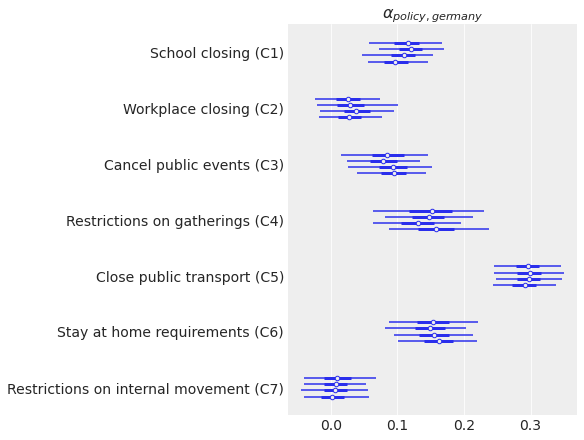

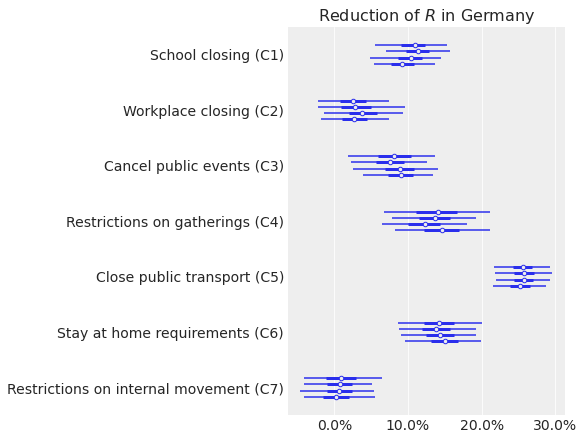

In [42]:
ds = trace.posterior
var_name = r"$\alpha_{policy,germany}$"
ds["School closing (C1)"] = ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], figsize=(8, 6), kind="forestplot")
plt.title(var_name)

fig, ax = plt.subplots(figsize=(8, 6))
ds = trace.posterior
ds["School closing (C1)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Germany")

Text(0.5, 1.0, 'Reduction of $R$ in Italy')

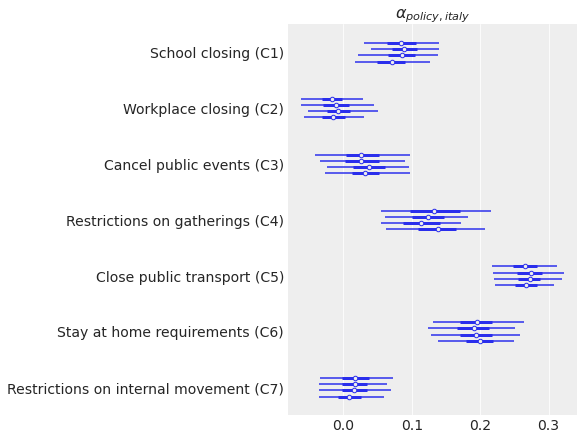

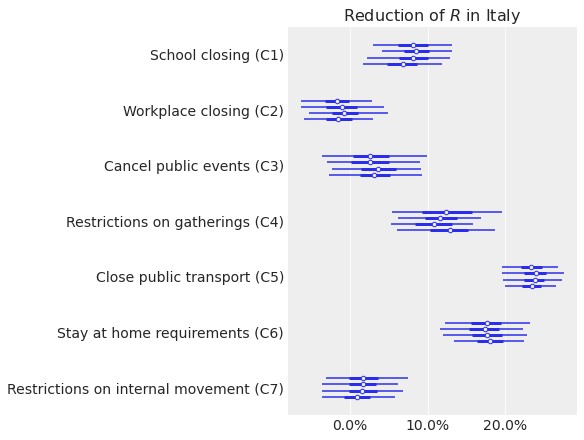

In [43]:
ds = trace.posterior
var_name = r"$\alpha_{policy,italy}$"
ds["School closing (C1)"] = ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], figsize=(8, 6), kind="forestplot")
plt.title(var_name)

fig, ax = plt.subplots(figsize=(8, 6))
ds = trace.posterior
ds["School closing (C1)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Italy")

Text(0.5, 1.0, 'Reduction of $R$ in Austria')

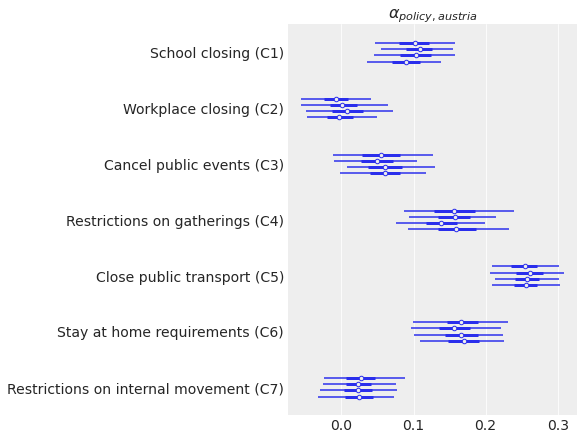

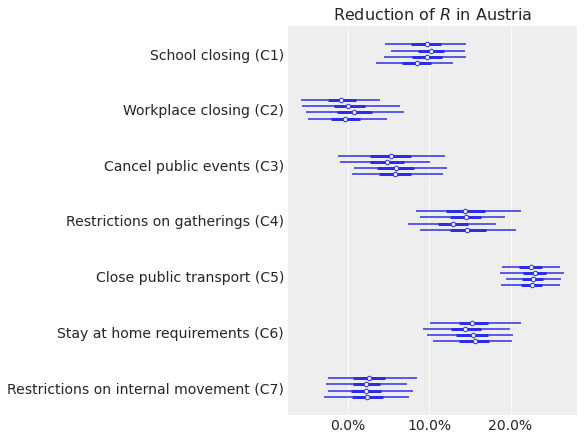

In [44]:
ds = trace.posterior
var_name = r"$\alpha_{policy,austria}$"
ds["School closing (C1)"] = ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], figsize=(8, 6), kind="forestplot")
plt.title(var_name)

fig, ax = plt.subplots(figsize=(8, 6))
ds = trace.posterior
ds["School closing (C1)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Austria")

Text(0.5, 1.0, 'Reduction of $R$ in Poland')

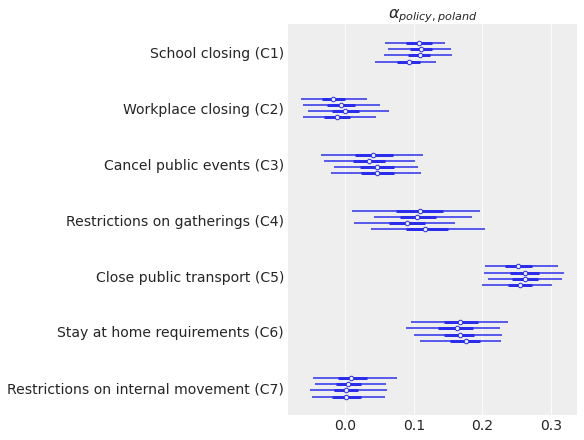

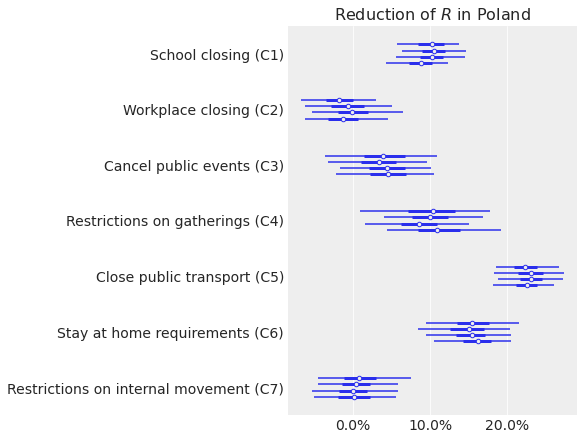

In [45]:
ds = trace.posterior
var_name = r"$\alpha_{policy,poland}$"
ds["School closing (C1)"] = ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], figsize=(8, 6), kind="forestplot")
plt.title(var_name)

fig, ax = plt.subplots(figsize=(8, 6))
ds = trace.posterior
ds["School closing (C1)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Poland")

Text(0.5, 1.0, 'Reduction of $R$ in Belgium')

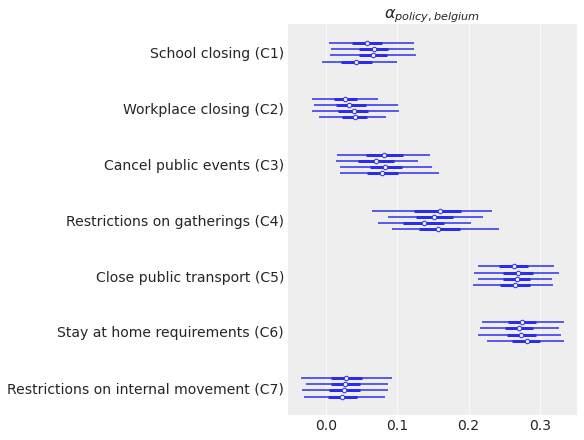

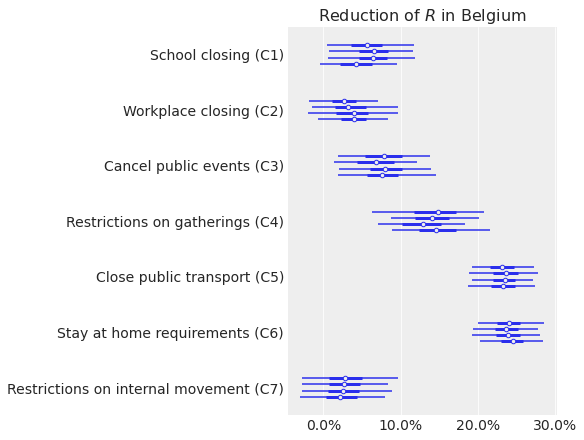

In [46]:
ds = trace.posterior
var_name = r"$\alpha_{policy,belgium}$"
ds["School closing (C1)"] = ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], figsize=(8, 6), kind="forestplot")
plt.title(var_name)

fig, ax = plt.subplots(figsize=(8, 6))
ds = trace.posterior
ds["School closing (C1)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Belgium")

Text(0.5, 1.0, 'Reduction of $R$ in Croatia')

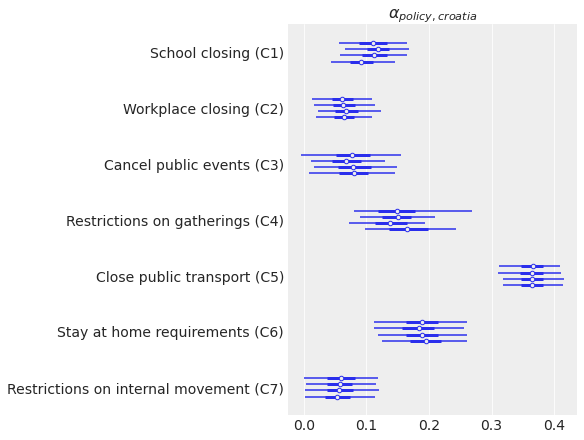

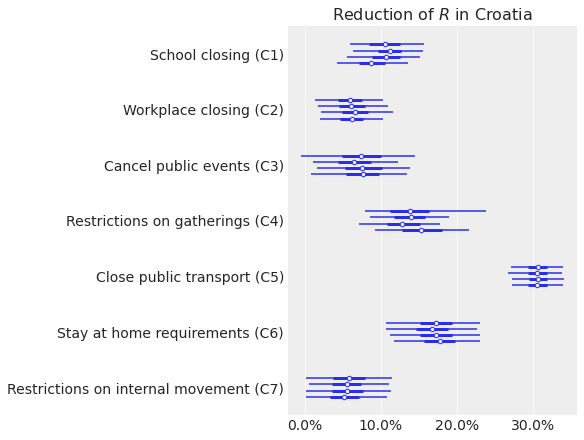

In [47]:
ds = trace.posterior
var_name = r"$\alpha_{policy,croatia}$"
ds["School closing (C1)"] = ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], figsize=(8, 6), kind="forestplot")
plt.title(var_name)

fig, ax = plt.subplots(figsize=(8, 6))
ds = trace.posterior
ds["School closing (C1)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 0]
ds["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 1]
ds["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 2]
ds["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 3]
ds["Close public transport (C5)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 4]
ds["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 5]
ds["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds[var_name][:, :, 6]
az.plot_forest(ds, var_names=["School closing (C1)", \
                              "Workplace closing (C2)", \
                              "Cancel public events (C3)", \
                              "Restrictions on gatherings (C4)", \
                              "Close public transport (C5)", \
                              "Stay at home requirements (C6)", \
                              "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Croatia")

In [31]:
with model:
    pp = pm.sample_posterior_predictive(trace, samples=1000, \
                                        var_names=[r'$i_{germany}(t)$', r'$i_{italy}(t)$', \
                                                   r'$i_{austria}(t)$', r'$i_{poland}(t)$', \
                                                   r'$i_{belgium}(t)$', \
                                                   r'$i_{croatia}(t)$', \
                                                   r'$\Sigma_{trend,common}$', \
                                                   r'$\varepsilon_{i(t)}$'])
    _pp_germany = pp[r'$i_{germany}(t)$']
    _pp_italy = pp[r'$i_{italy}(t)$']
    _pp_austria = pp[r'$i_{austria}(t)$']
    _pp_poland = pp[r'$i_{poland}(t)$']
    
    _pp_belgium = pp[r'$i_{belgium}(t)$']
    _pp_croatia = pp[r'$i_{croatia}(t)$']
    
    pp_trend = pp[r'$\Sigma_{trend,common}$']
    
    pp_eps = pp[r'$\varepsilon_{i(t)}$']
    pass

E:\anaconda3\envs\covid19bayes\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [32]:
pp_germany = pm.Normal.dist(mu=_pp_germany, sigma=pp_eps.reshape((pp_eps.shape[0], 1))).random()
pp_italy = pm.Normal.dist(mu=_pp_italy, sigma=pp_eps.reshape((pp_eps.shape[0], 1))).random()
pp_austria = pm.Normal.dist(mu=_pp_austria, sigma=pp_eps.reshape((pp_eps.shape[0], 1))).random()
pp_poland = pm.Normal.dist(mu=_pp_poland, sigma=pp_eps.reshape((pp_eps.shape[0], 1))).random()
pp_belgium = pm.Normal.dist(mu=_pp_belgium, sigma=pp_eps.reshape((pp_eps.shape[0], 1))).random()
pp_croatia = pm.Normal.dist(mu=_pp_croatia, sigma=pp_eps.reshape((pp_eps.shape[0], 1))).random()

In [33]:
pp_germany.shape

(1000, 293)

E:\anaconda3\envs\covid19bayes\lib\site-packages\arviz\plots\hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


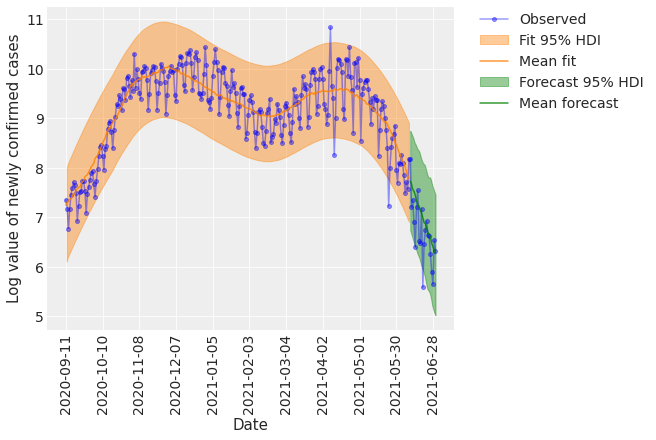

In [34]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('white')

germany_log = it_obs_log[0][1:]
ax.plot(np.arange(len(germany_log)), germany_log, "o-", ms=4, \
        color="blue", alpha=0.4, label="Observed")
az.plot_hdi(np.arange(len(germany_log[:-forecast_days])), pp_germany[:, :-forecast_days], hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Fit 95% HDI"})
ax.plot(np.arange(len(germany_log[:-forecast_days])), pp_germany.mean(0)[:-forecast_days], \
        color="#FF7F00", alpha=0.8, label="Mean fit")

az.plot_hdi(np.arange(len(germany_log[:-forecast_days]), len(germany_log)), \
            pp_germany[:, -forecast_days:], hdi_prob=0.95, \
            color="green", fill_kwargs={"alpha": 0.4, "label": "Forecast 95% HDI"})
ax.plot(np.arange(len(germany_log[:-forecast_days]), len(germany_log)), \
        pp_germany.mean(0)[-forecast_days:], color="green", \
        alpha=0.8, label="Mean forecast")

x_day_interval = max(1, (len(dates[1:])) // 10)
plt.xticks(list(range(0, len(dates[1:]), x_day_interval)), dates[1::x_day_interval], rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Log value of newly confirmed cases")
#ax.legend(ncol=3, fontsize=10, loc="upper center")
ax.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.show()

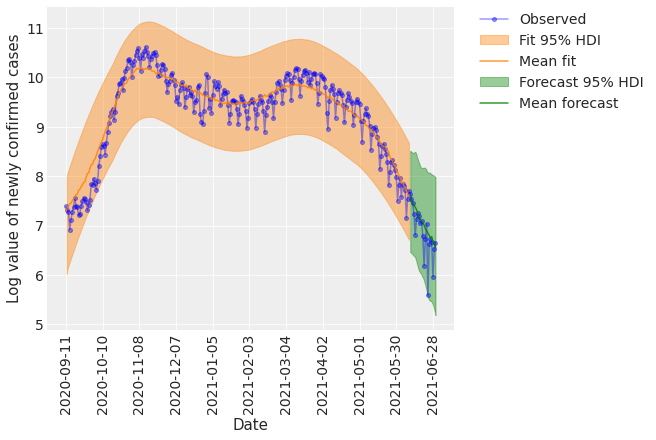

In [35]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('white')

italy_log = it_obs_log[1][1:]
ax.plot(np.arange(len(italy_log)), italy_log, "o-", ms=4, \
        color="blue", alpha=0.4, label="Observed")
az.plot_hdi(np.arange(len(italy_log[:-forecast_days])), pp_italy[:, :-forecast_days], hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Fit 95% HDI"})
ax.plot(np.arange(len(italy_log[:-forecast_days])), pp_italy.mean(0)[:-forecast_days], \
        color="#FF7F00", alpha=0.8, label="Mean fit")

az.plot_hdi(np.arange(len(italy_log[:-forecast_days]), len(italy_log)), \
            pp_italy[:, -forecast_days:], hdi_prob=0.95, \
            color="green", fill_kwargs={"alpha": 0.4, "label": "Forecast 95% HDI"})
ax.plot(np.arange(len(italy_log[:-forecast_days]), len(italy_log)), \
        pp_italy.mean(0)[-forecast_days:], color="green", \
        alpha=0.8, label="Mean forecast")

x_day_interval = max(1, (len(dates[1:])) // 10)
plt.xticks(list(range(0, len(dates[1:]), x_day_interval)), dates[1::x_day_interval], rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Log value of newly confirmed cases")
#ax.legend(ncol=3, fontsize=10, loc="upper center")
ax.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.show()

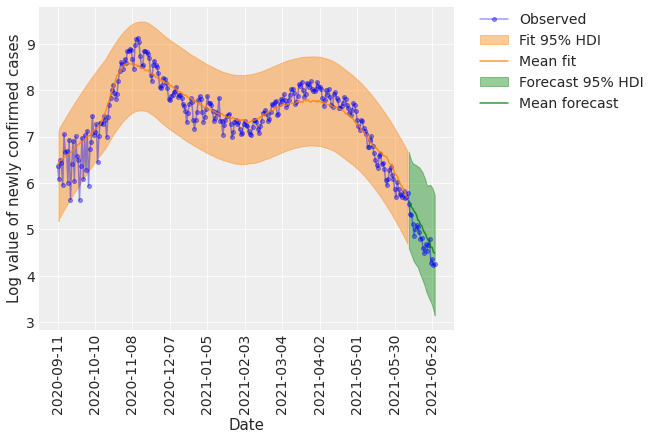

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('white')

austria_log = it_obs_log[2][1:]
ax.plot(np.arange(len(austria_log)), austria_log, "o-", ms=4, \
        color="blue", alpha=0.4, label="Observed")
az.plot_hdi(np.arange(len(austria_log[:-forecast_days])), pp_austria[:, :-forecast_days], hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Fit 95% HDI"})
ax.plot(np.arange(len(austria_log[:-forecast_days])), pp_austria.mean(0)[:-forecast_days], \
        color="#FF7F00", alpha=0.8, label="Mean fit")

az.plot_hdi(np.arange(len(austria_log[:-forecast_days]), len(austria_log)), \
            pp_austria[:, -forecast_days:], hdi_prob=0.95, \
            color="green", fill_kwargs={"alpha": 0.4, "label": "Forecast 95% HDI"})
ax.plot(np.arange(len(austria_log[:-forecast_days]), len(austria_log)), \
        pp_austria.mean(0)[-forecast_days:], color="green", \
        alpha=0.8, label="Mean forecast")

x_day_interval = max(1, (len(dates[1:])) // 10)
plt.xticks(list(range(0, len(dates[1:]), x_day_interval)), dates[1::x_day_interval], rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Log value of newly confirmed cases")
#ax.legend(ncol=3, fontsize=10, loc="upper center")
ax.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.show()

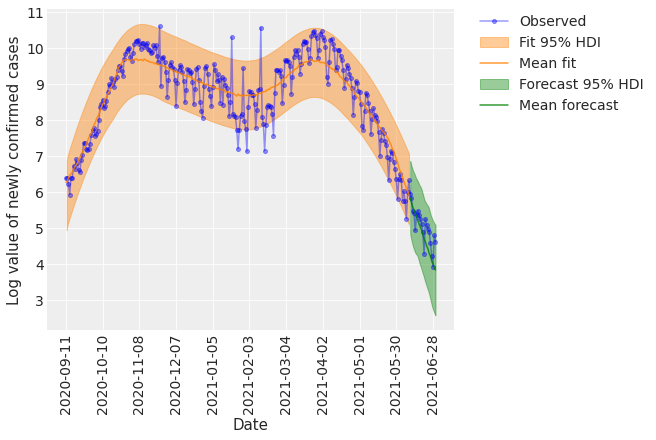

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('white')

poland_log = it_obs_log[3][1:]
ax.plot(np.arange(len(poland_log)), poland_log, "o-", ms=4, \
        color="blue", alpha=0.4, label="Observed")
az.plot_hdi(np.arange(len(poland_log[:-forecast_days])), pp_poland[:, :-forecast_days], hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Fit 95% HDI"})
ax.plot(np.arange(len(poland_log[:-forecast_days])), pp_poland.mean(0)[:-forecast_days], \
        color="#FF7F00", alpha=0.8, label="Mean fit")

az.plot_hdi(np.arange(len(poland_log[:-forecast_days]), len(poland_log)), \
            pp_poland[:, -forecast_days:], hdi_prob=0.95, \
            color="green", fill_kwargs={"alpha": 0.4, "label": "Forecast 95% HDI"})
ax.plot(np.arange(len(poland_log[:-forecast_days]), len(poland_log)), \
        pp_poland.mean(0)[-forecast_days:], color="green", \
        alpha=0.8, label="Mean forecast")

x_day_interval = max(1, (len(dates[1:])) // 10)
plt.xticks(list(range(0, len(dates[1:]), x_day_interval)), dates[1::x_day_interval], rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Log value of newly confirmed cases")
#ax.legend(ncol=3, fontsize=10, loc="upper center")
ax.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.show()

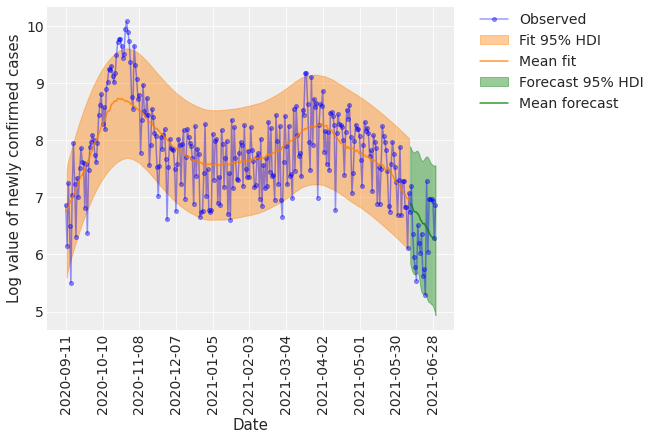

In [38]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('white')

belgium_log = it_obs_log[4][1:]
ax.plot(np.arange(len(belgium_log)), belgium_log, "o-", ms=4, \
        color="blue", alpha=0.4, label="Observed")
az.plot_hdi(np.arange(len(belgium_log[:-forecast_days])), pp_belgium[:, :-forecast_days], hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Fit 95% HDI"})
ax.plot(np.arange(len(belgium_log[:-forecast_days])), pp_belgium.mean(0)[:-forecast_days], \
        color="#FF7F00", alpha=0.8, label="Mean fit")

az.plot_hdi(np.arange(len(belgium_log[:-forecast_days]), len(belgium_log)), \
            pp_belgium[:, -forecast_days:], hdi_prob=0.95, \
            color="green", fill_kwargs={"alpha": 0.4, "label": "Forecast 95% HDI"})
ax.plot(np.arange(len(belgium_log[:-forecast_days]), len(belgium_log)), \
        pp_belgium.mean(0)[-forecast_days:], color="green", \
        alpha=0.8, label="Mean forecast")

x_day_interval = max(1, (len(dates[1:])) // 10)
plt.xticks(list(range(0, len(dates[1:]), x_day_interval)), dates[1::x_day_interval], rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Log value of newly confirmed cases")
#ax.legend(ncol=3, fontsize=10, loc="upper center")
ax.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.show()

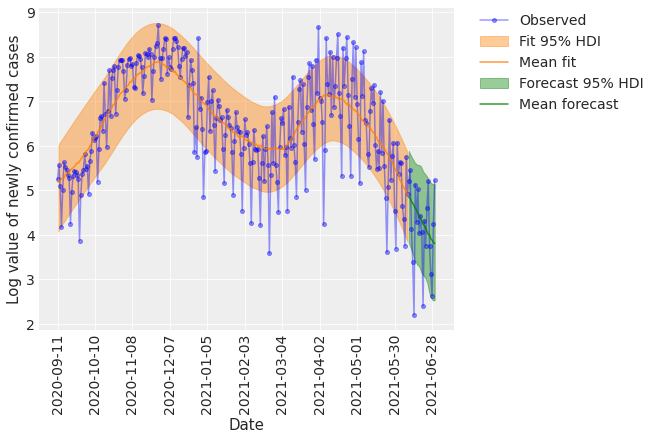

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('white')

croatia_log = it_obs_log[5][1:]
ax.plot(np.arange(len(croatia_log)), croatia_log, "o-", ms=4, \
        color="blue", alpha=0.4, label="Observed")
az.plot_hdi(np.arange(len(croatia_log[:-forecast_days])), pp_croatia[:, :-forecast_days], hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Fit 95% HDI"})
ax.plot(np.arange(len(croatia_log[:-forecast_days])), pp_croatia.mean(0)[:-forecast_days], \
        color="#FF7F00", alpha=0.8, label="Mean fit")

az.plot_hdi(np.arange(len(croatia_log[:-forecast_days]), len(croatia_log)), \
            pp_croatia[:, -forecast_days:], hdi_prob=0.95, \
            color="green", fill_kwargs={"alpha": 0.4, "label": "Forecast 95% HDI"})
ax.plot(np.arange(len(croatia_log[:-forecast_days]), len(croatia_log)), \
        pp_croatia.mean(0)[-forecast_days:], color="green", \
        alpha=0.8, label="Mean forecast")

x_day_interval = max(1, (len(dates[1:])) // 10)
plt.xticks(list(range(0, len(dates[1:]), x_day_interval)), dates[1::x_day_interval], rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Log value of newly confirmed cases")
#ax.legend(ncol=3, fontsize=10, loc="upper center")
ax.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.show()

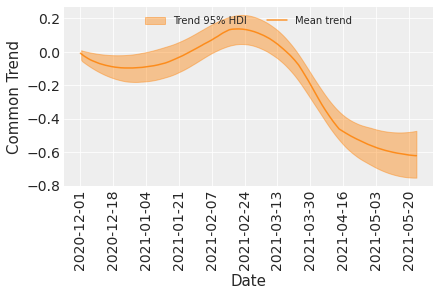

In [40]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

az.plot_hdi(np.arange(len(dates)-1-fixed_days-forecast_fixed_days), pp_trend, hdi_prob=0.95, \
            color="#FF7F00", fill_kwargs={"alpha": 0.4, "label": "Trend 95% HDI"})
ax.plot(np.arange(len(dates)-1-fixed_days-forecast_fixed_days), pp_trend.mean(0), color="#FF7F00", \
        alpha=0.8, label="Mean trend")

x_day_interval = max(1, (len(dates[1:])-fixed_days-forecast_fixed_days) // 10)
plt.xticks(list(range(0, len(dates[1:])-fixed_days-forecast_fixed_days, x_day_interval)), \
           dates[1+fixed_days:-forecast_fixed_days:x_day_interval], \
           rotation="vertical")
plt.xlabel("Date")
plt.ylabel("Common Trend")
ax.legend(ncol=3, fontsize=10, loc="upper center")
plt.show()

E:\anaconda3\envs\covid19bayes\lib\site-packages\arviz\plots\traceplot.py:212: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (31), generating only 20 plots
  warnings.warn(


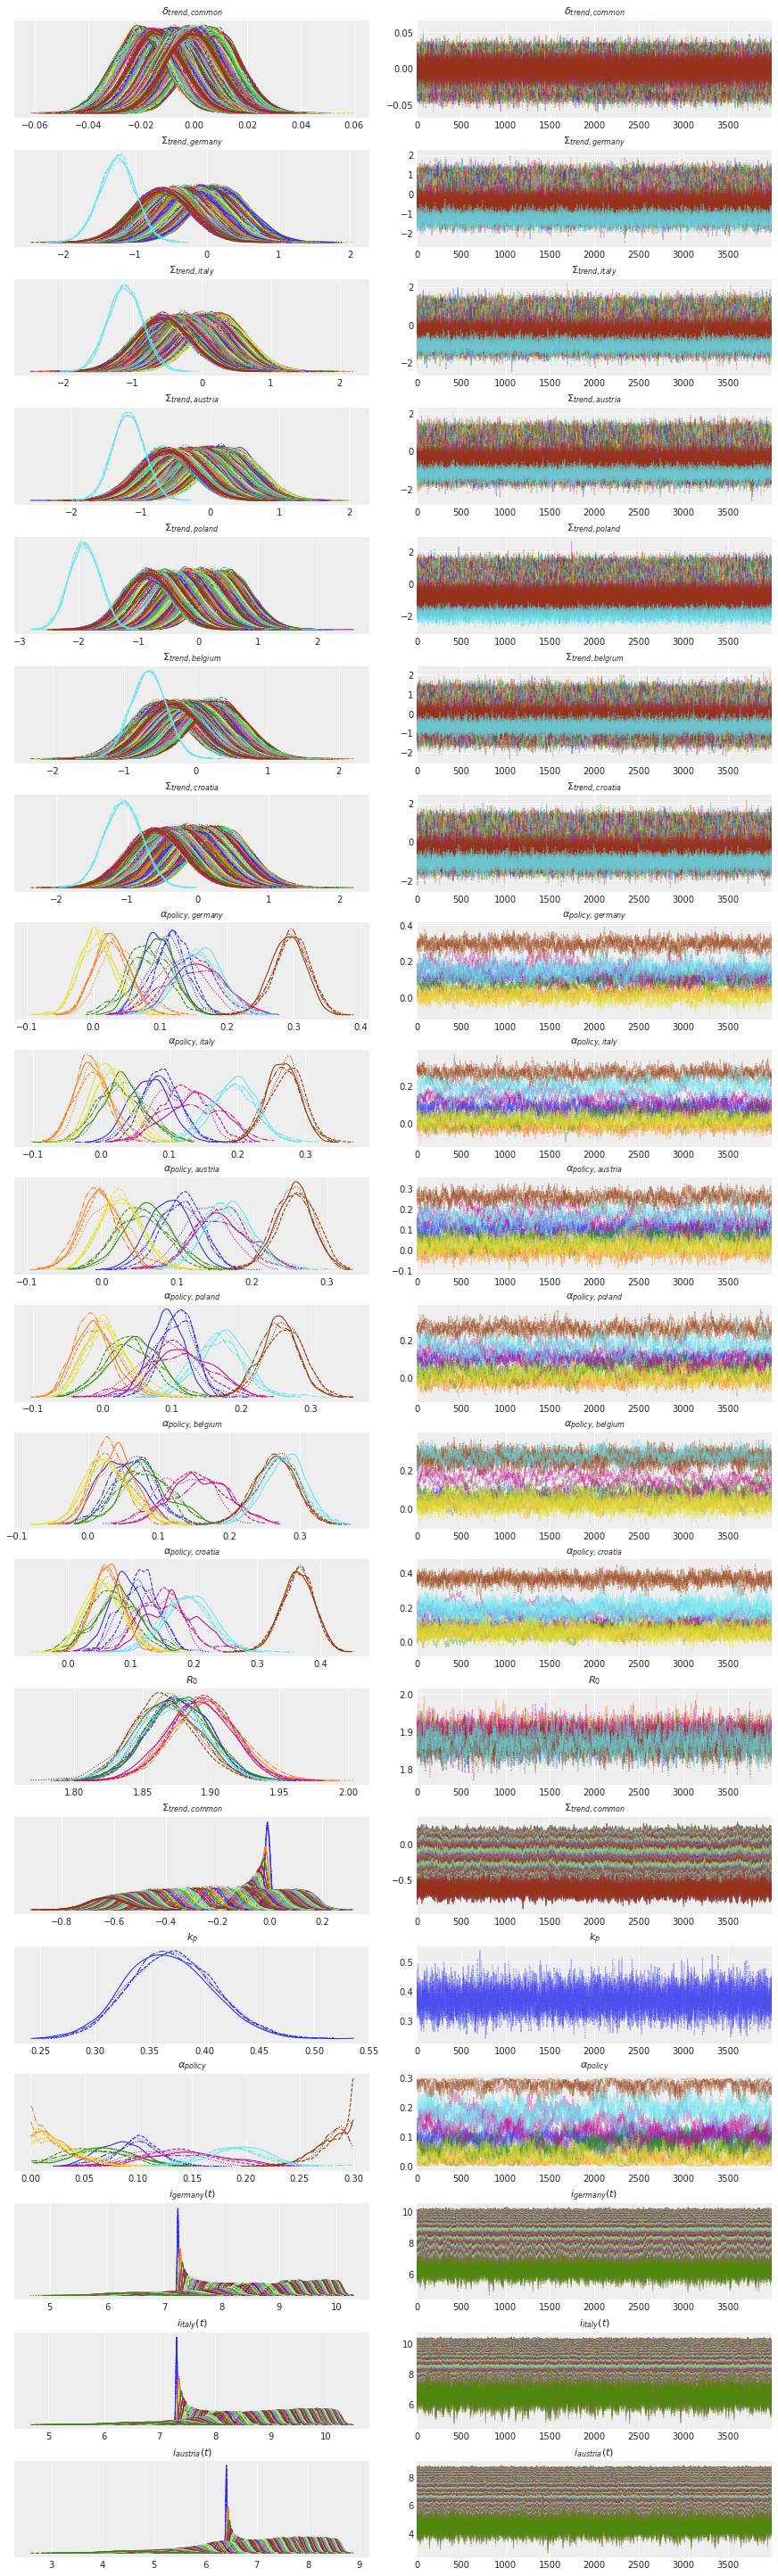

In [41]:
az.plot_trace(trace)
plt.show()